# Housing market trends in Augusta and North Augusta

We will focus on four zipcodes and on houses built less than 10 years ago for this project

In [1]:
# import libraries
import requests
import urllib.parse
import json
import time
import pandas as pd

In [2]:
# get the api key from the file
with open('apikeytaty.txt', 'r') as f:
    # read the api key
    API_token = f.read()
    

In [14]:
# this is for using the API
format = 'JSON'
query = 'propertyType:\"Single Family Dwelling\" AND yearBuilt:2019 AND (postalCode:29841 OR postalCode:30909 OR postalCode:30809 OR postalCode:30907) AND (mostRecentStatus:\"For Sale\" OR mostRecentStatus:Sold) AND prices.amountMin:>=300000 AND prices.amountMin:<=1000000'
num_records = 177
download = True

request_headers = {
	'Authorization': 'Bearer ' + API_token,
	'Content-Type': 'application/json',
}
request_data = {
    'query': query,
    'format': format,
    'num_records': num_records,
    'download': download
}

# Make the API call.
# this line deleted to protect the API key

# Do something with the response.
if r.status_code == 200:
	request_response = r.json()
	print(request_response)

	# Keep checking the request status until the download has completed
	download_id = request_response['id']
	download_status = request_response['status']

	while (download_status != 'completed'):
		time.sleep(5)
		download_r = requests.get('https://api.datafiniti.co/v4/downloads/' + str(download_id),headers=request_headers);
		download_response = download_r.json()
		download_status = download_response['status']
		print('Records downloaded: ' + str(download_response['num_downloaded']))

	# Once the download has completed, get the list of links to the result files and download each file
	if download_status == 'completed':
		result_list = download_response['results']
		i = 1;
		for result in result_list:
			filename = str(download_id) + '_' + str(i) + '.' + format
			urllib.request.urlretrieve(result,filename)
			print('File: ' + str(i) + ' out of ' + str(len(result_list)) + ' saved: ' + filename)
			i += 1

else:
	print('Request failed')
	print(r)


{'status': 'queued', 'num_downloaded': 0, 'num_records_suppressed': 0, 'total_cost': 0, 'fields': [{'name': 'address'}, {'name': 'apiURLs', 'flatten': False}, {'name': 'brokers', 'flatten': False, 'sub_fields': [{'name': 'agent'}, {'name': 'company'}, {'name': 'dateSeen'}, {'name': 'emails'}, {'name': 'licenseType'}, {'name': 'licenseNumber'}, {'name': 'phones'}, {'name': 'websites'}, {'name': 'workEmail'}]}, {'name': 'buildingName'}, {'name': 'city'}, {'name': 'congressionalDistrictHouse'}, {'name': 'country'}, {'name': 'county'}, {'name': 'countyFIPS'}, {'name': 'currentOwnerType'}, {'name': 'dateAdded'}, {'name': 'dateUpdated'}, {'name': 'deposits', 'flatten': False, 'sub_fields': [{'name': 'amount'}, {'name': 'currency'}, {'name': 'dateSeen'}]}, {'name': 'descriptions', 'flatten': False, 'sub_fields': [{'name': 'dateSeen'}, {'name': 'value'}]}, {'name': 'features', 'flatten': False}, {'name': 'fees', 'flatten': False, 'sub_fields': [{'name': 'amountMax'}, {'name': 'amountMin'}, {'n

In [16]:
# Set the location of your file here
filename = '190498_1.JSON'

records = []
# parse data
with open(filename) as myFile:
	for line in myFile:
		records.append(json.loads(line))



In [17]:
# save data to a file
with open('data2019.json', 'w') as outfile:
    json.dump(records, outfile)  

In [18]:
# load data from a file
with open('data2019.json') as json_file:
    datafromfile5 = json.load(json_file)

## Pre procesing data

In [4]:
# Lets first load the data from the jason file

# load data from a file
with open('data2023.json') as json_file:
    record23 = json.load(json_file)

In [5]:
# load data from a file
with open('data2022.json') as json_file:
    record22 = json.load(json_file)

In [6]:
# load data from a file
with open('data2021.json') as json_file:
    record21 = json.load(json_file)

In [7]:
# load data from a file
with open('data2020.json') as json_file:
    record20 = json.load(json_file)

In [8]:
# load data from a file
with open('data2019.json') as json_file:
    record19 = json.load(json_file)

In [9]:
# append data from 2022, 2021, 2020, 2019  to 2023
record23.extend(record22)
record23.extend(record21)
record23.extend(record20)
record23.extend(record19)

In [10]:
import re
from datetime import datetime

In [11]:
# functions below help extract year sold and price sold information from the string
strprice = 'Date: 2/17/2023 - Price: $497125 - Event: Sold (MLS)'

def decimal_year(date):
    start = datetime(date.year, 1, 1)
    end = datetime(date.year + 1, 1, 1)
    total = end - start
    elapsed = date - start
    return date.year + elapsed / total

def extract_info(strprice):
    date_pattern = 'Date: (.*?) -'
    price_pattern = 'Price: (.*?) -'

    date_str = re.search(date_pattern, strprice).group(1)
    date_obj = datetime.strptime(date_str, "%m/%d/%Y")
    float_date = decimal_year(date_obj)

    price = int(re.search(price_pattern, strprice).group(1).replace('$',''))


    return float_date, price

extracted_date, extracted_price = extract_info(strprice)

print(f'Extracted Date: {extracted_date} Extracted Price: {extracted_price}')

Extracted Date: 2023.1287671232876 Extracted Price: 497125


In [12]:
# Had to do some manual cleaning of the data, did not want to do it in the code (faster than writing code to do it)
#record23[244]['features'][18]['value'][3]
# delete an element from a list
del record23[244]['features'][18]['value'][3]
del record23[300]['features'][89]['value'][9]
del record23[310]['features'][85]['value'][0]
del record23[668]['features'][11]['value'][3]
del record23[766]['features'][35]['value'][0]
del record23[767]['features'][94]['value'][1]
del record23[781]['features'][73]['value'][1]
del record23[785]['features'][84]['value'][1]
del record23[884]['features'][19]['value'][1]
del record23[912]['features'][20]['value'][5]
del record23[977]['features'][18]['value'][2]
del record23[979]['features'][20]['value'][4]
del record23[984]['features'][31]['value'][2]
del record23[1015]['features'][10]['value'][2]
del record23[1016]['features'][12]['value'][2]
del record23[1017]['features'][12]['value'][2]
del record23[1023]['features'][9]['value'][0]
del record23[1024]['features'][25]['value'][0]
del record23[1085]['features'][77]['value'][1]
del record23[1229]['features'][22]['value'][1]
del record23[1232]['features'][19]['value'][1]
del record23[1242]['features'][76]['value'][1]
del record23[1282]['features'][106]['value'][0]
del record23[1362]['features'][23]['value'][1]
del record23[1366]['features'][19]['value'][3]
del record23[1438]['features'][20]['value'][2]
del record23[1464]['features'][18]['value'][4]
del record23[1549]['features'][19]['value'][1]

In [80]:
i=0
for features in record23[1549]['features']:
    print(i, ' ', features['key'])
    i += 1

record23[1549]['features'][19]['value'][1]

0   Parcel Number
1   Heating & Cooling Information
2   Building Information
3   Property Information
4   Price/Sq.Ft.
5   Bedroom 3 Information
6   Bedroom 5 Information
7   Redfin Rental Estimate
8   Detailed property type
9   Bedroom 4 Information
10   Style
11   Neighborhood Information
12   Interior Features
13   Bedroom 2 Information
14   Exterior Features
15   Construction
16   Room Information
17   Rooms Type
18   PropertyUseGroup
19   Price History - Redfin
20   Location Information
21   HVACHeatingDetail
22   Owner Bedroom Information
23   Utility Information
24   Miscellaneous features
25   Lot Information
26   Community
27   APN


'Date: 9/31/2019 - Price: $283000 - Event: Sold (MLS)'

In [82]:
# Lets put all this information in a pandas dataframe 

# create an empty dataframe
df = pd.DataFrame(columns=['year_built', 'sqft', 'lot_size', 'lotSizeUnit', 'date_sold', 'price_sold', 'postal_code'])

for i in range(0, len(record23)):

    # check if key exists and store values
    if 'lotSizeValue' in record23[i]:
        lotSizeValue = record23[i]['lotSizeValue']
        #print(lotSizeValue)
    else:
        lotSizeValue = 0

    # check if key exists and store values
    if 'lotSizeUnit' in record23[i]:
        lotSizeUnit = record23[i]['lotSizeUnit']
        #print(lotSizeUnit)
    else:
        lotSizeUnit = 'not found'

    # check if key exists and store values
    if 'postalCode' in record23[i]:
        postalCode = record23[i]['postalCode']
        #print(postalCode)
    else:
        postalCode = 0

    # check if key exists and store values
    if 'yearBuilt' in record23[i]:
        yearBuilt = record23[i]['yearBuilt']
        #print(yearBuilt)
    else:
        yearBuilt = 0

    # get the sqft
    sqft = 0
    for features in (record23[i]['features']):
        if features['key'] == 'Building Information':
            value = features['value'] # this is a list with all building information
            #print(value)
            # now we need to extract the sqft
            for item in value:
                if 'Total SqFt' in item:
                    # total sqft is there and we need to extract the value
                    sqft = int(''.join(filter(str.isdigit, item)))

    for features in (record23[i]['features']):
        if features['key'] == 'Price History - Redfin':
            value = features['value'] # this is a list with all price history information
            for listitem in value:
                if 'Sold' in listitem:
                    # sold price is there and we need to extract the value
                    print(i, ' ',listitem)
                    # now we need to extract the date and price
                    extracted_date, extracted_price = extract_info(listitem)
                    #print(f'Extracted Date: {extracted_date} Extracted Price: {extracted_price}')

                    # now we will add all this information to a pandas dataframe
                    df1 = pd.DataFrame({'year_built': yearBuilt ,
                                        'sqft': sqft,
                                        'lot_size': lotSizeValue,
                                        'lotSizeUnit': lotSizeUnit,
                                       'date_sold': [extracted_date], 
                                       'price_sold': [extracted_price],
                                       'postal_code': postalCode,})
                    
                    
                    # concat df1 to the dataframe df
                    df = pd.concat([df, df1], ignore_index=True)

27   Date: 8/31/2023 - Price: $479900 - Event: Sold (MLS)
30   Date: 8/28/2023 - Price: $584900 - Event: Sold (MLS)
50   Date: 6/5/2023 - Price: $523360 - Event: Sold (MLS)
53   Date: 8/25/2023 - Price: $335330 - Event: Sold (MLS)
56   Date: 6/9/2023 - Price: $463000 - Event: Sold (MLS)
58   Date: 5/25/2023 - Price: $479795 - Event: Sold (MLS)
59   Date: 8/18/2023 - Price: $599900 - Event: Sold (MLS)
64   Date: 6/14/2023 - Price: $314830 - Event: Sold (MLS)
65   Date: 8/11/2023 - Price: $339900 - Event: Sold (MLS)
68   Date: 4/12/2023 - Price: $625000 - Event: Sold (MLS)
73   Date: 7/24/2023 - Price: $549900 - Event: Sold (MLS)
74   Date: 7/28/2023 - Price: $309900 - Event: Sold (MLS)
75   Date: 7/26/2023 - Price: $320900 - Event: Sold (MLS)
76   Date: 7/27/2023 - Price: $479900 - Event: Sold (MLS)
77   Date: 6/23/2023 - Price: $493275 - Event: Sold (MLS)
86   Date: 7/7/2023 - Price: $543140 - Event: Sold (MLS)
87   Date: 7/12/2023 - Price: $334330 - Event: Sold (MLS)
88   Date: 10/10/

In [101]:
# filter the data
# delete rows with sqft = 0, lot_size = 0, year_built = 0, postal_code = 0 or lotSizeUnit = 'not found'
df = df[df.sqft != 0]
df = df[df.lot_size != 0]
df = df[df.year_built != 0]
df = df[df.postal_code != 0]
df = df[df.lotSizeUnit != 'not found']
# delete abormally high prices
df = df[df.price_sold < 1_800_000]
# add a lower limit for the price
df = df[df.price_sold > 500_000]



In [86]:
# add a new column with the price per sqft
df['price_per_sqft'] = df['price_sold']/df['sqft']

In [87]:
df[df['price_per_sqft'] > 600]

,year_built,sqft,lot_size,lotSizeUnit,date_sold,price_sold,postal_code,price_per_sqft


In [88]:
import matplotlib.pyplot as plt

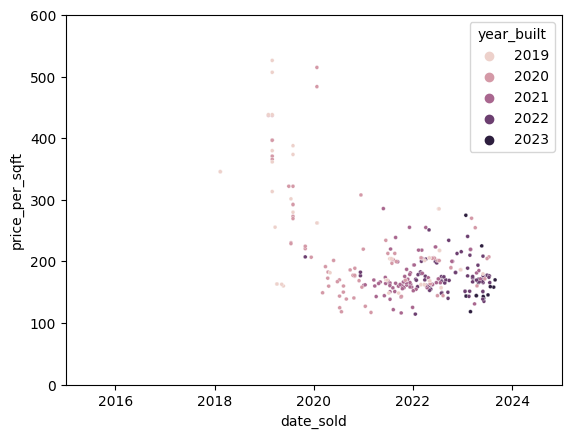

In [102]:
# plot the price per sqft vs date sold with yearBuilt as hue
import seaborn as sns
sns.scatterplot(data=df, x="date_sold", y="price_per_sqft", hue="year_built", s=8)

plt.xlim(2015, 2025)
plt.ylim(0, 600)
plt.show()


In [ ]:
# There is still much than could have been done with this data, but I will stop here for now.